In [ ]:
import pandas as pd
import numpy as np

**Dataset Buıld Code For large Amount of Data**

In [ ]:
all_pos = pd.read_csv("Suicide_Detection.csv")

In [ ]:
all_pos.drop("Unnamed: 0",axis=1)

In [ ]:
len(all_pos.loc[all_pos["class"] == "non-suicide"])

In [ ]:
len(all_pos.loc[all_pos["class"] == "suicide"])

In [ ]:
pos_samples = all_pos.loc[all_pos["class"] == "suicide"]
neg_samples = all_pos.loc[all_pos["class"] == "non-suicide"]

In [ ]:
not_size = 10000
N = len(pos_samples)//not_size

for i in range(N):
    if i != N-1:
        pos_subset = pos_samples[i*not_size:(i+1)*not_size]
        neg_subset = neg_samples[i*not_size:(i+1)*not_size]

        pos_subset.to_csv("pos_samples"+str(i)+".csv",index=False)
        neg_subset.to_csv("neg_samples"+str(i)+".csv",index=False)
    else:
        pos_subset = pos_samples[(i+1)*not_size:]
        neg_subset = neg_samples[(i+1)*not_size:]
        pos_subset.to_csv("pos_samples"+str(i)+".csv",index=False)
        neg_subset.to_csv("neg_samples"+str(i)+".csv",index=False)

In [ ]:
all_pos["class"] = all_pos["class"].astype("category")
classdict = dict(enumerate(all_pos["class"].cat.categories))
all_pos['class'] = all_pos['class'].cat.codes

In [ ]:
classdict

In [ ]:
all_pos.to_csv("all_samples.csv")

In [ ]:
# Above is the dataset build part 

**Side Feature Construction for 3 Datasets Combined**

In [ ]:
#CLASSİCAL METHODS ONLY FEATURES START HERE
#Big Kaggle Dataset Part
dataset = pd.read_csv("LIWC-results.csv")

In [ ]:
len(dataset)

In [ ]:
print(len(dataset.loc[dataset["class"] ==1]))
print(len(dataset.loc[dataset["class"] ==0]))

In [ ]:
#DATASET PREPARATION FOR BIG KAGGLE DATA
dataset = dataset.drop("Unnamed: 0",1)
dataset = dataset.drop("Unnamed: 0.1",1)
dataset = dataset.drop("text",1)
dataset = dataset.dropna()
labels = dataset["class"]
labels = labels.astype("int")
data = dataset.drop("class",1)

In [ ]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=data, y=labels, K=20)

In [ ]:
selected_data = pd.DataFrame()
#selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
for i in selected_features:
    data = dataset[i]
    selected_data[i] = data

In [ ]:
means_selected_data = np.mean(selected_data)
stds_selected_data = np.std(selected_data)
selected_data = (selected_data-means_selected_data)/stds_selected_data

In [ ]:
selected_data.head()

In [ ]:
from sklearn.model_selection import train_test_split
select_train_set,select_test_set,select_train_labels,select_test_labels = train_test_split(selected_data,labels,test_size=0.1,shuffle= True,random_state=42,stratify=labels)
print("len train: ",len(select_train_set),"len test: ",len(select_test_set))

In [ ]:
import matplotlib.pyplot as plt

import lightgbm

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=3,n_estimators=1000,num_leaves=100,colsample_bynode= 0.6,colsample_bytree= 0.64079,learning_rate=0.01)

lgbm_model.fit(select_train_set, select_train_labels)

y_pred = lgbm_model.predict(select_test_set)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(select_test_labels, y_pred)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(select_test_labels,y_pred)

In [ ]:
#TESTING KAGGLE (SHANON) DATASET
test_kaggle = pd.read_csv("kaggle_test_LIWC.csv")

In [ ]:
selected_data = pd.DataFrame()
#selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
for i in selected_features:
    selected_data[i] = test_kaggle[i]
kaggle_test = selected_data
kaggle_label = test_kaggle["cls"]

In [ ]:
kaggle_test = (kaggle_test-means_selected_data)/stds_selected_data

In [ ]:
y_pred_kaggle = lgbm_model.predict(kaggle_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(kaggle_label, y_pred_kaggle)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(kaggle_label,y_pred_kaggle)

In [ ]:
#TESTING reddıt (LIFE) DATASET
test_reddit = pd.read_csv("reddit_corpus_agree_LIWC.csv")

In [ ]:
selected_data = pd.DataFrame()
selected_features = ["Clout","Tone","Linguistic","death","WC","Cognition","WPS","focuspast","focusfuture","ppron","Affect","money"]
for i in selected_features:
    selected_data[i] = test_reddit[i]
reddit_test = selected_data
test_reddit["cls"][test_reddit["cls"] =="No risk"]=0 
test_reddit["cls"][test_reddit["cls"] =="Risk"]=1
reddit_test_label = test_reddit["cls"].astype("int")


In [ ]:
reddit_test = (reddit_test-means_selected_data)/stds_selected_data

In [ ]:
reddit_test_label.values

In [ ]:
y_pred_reddit = lgbm_model.predict(reddit_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(reddit_test_label.values, y_pred_reddit)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(reddit_test_label.values,y_pred_reddit)

**Large Neutral Dataset Oluşturma Kısmı (Imbalanced Classification)**

In [ ]:
neutral_data = pd.read_csv("training.1600000.processed.noemoticon.csv")
neutral_data.columns = ["Polarity","Id","Date","Query","User","text"]
# the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

In [ ]:
neutral_data.head()
len(neutral_data)

In [ ]:
zero_col = np.zeros(len(neutral_data))
neutral_data["class"] = zero_col

In [122]:
#Sentiment140 Neural Post Data
neutral_sent140 = neutral_data[["text","class"]]
# Save and run the LIWC
neutral_sent140.to_csv("sent140_neutral.csv")

In [123]:
#LOAD THE LIWC RESULT
sent140_neu = pd.read_csv("sent140_neutral-LIWC Analysis.csv")

In [124]:
sent140_labels = sent140_neu["class"]
sent140_neu_test = sent140_neu[selected_features]
sent140_neu_test = (sent140_neu_test-means_selected_data)/stds_selected_data

In [125]:
sen140pred = lgbm_model.predict(sent140_neu_test)

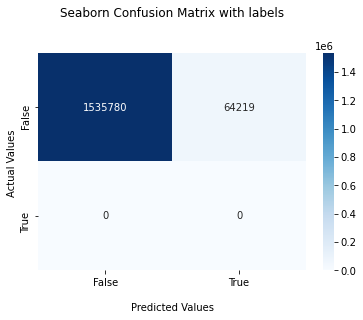

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(sent140_labels.values,sen140pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=cf_matrix, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

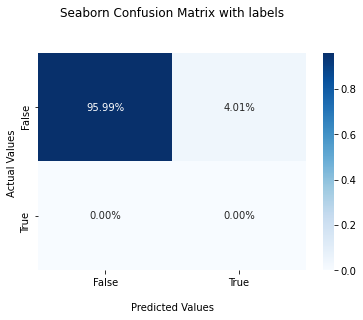

In [127]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Schoene Test
schoene_neu = pd.read_csv("NEU-LIWC Analysis.csv")
schoene_neu.head()
schoene_neu.drop(columns=["labels"],inplace= True)
schoene_neu["class"] = np.zeros(len(schoene_neu))

In [ ]:
schoene_neu_labels = schoene_neu["class"]
schoene_neu_test = schoene_neu[selected_features]
schoene_neu_test = (schoene_neu_test-means_selected_data)/stds_selected_data

In [ ]:
schoene_neu_pred = lgbm_model.predict(schoene_neu_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(schoene_neu_labels.values,schoene_neu_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(cf_matrix).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
schoene_all_test = np.append(kaggle_test,schoene_neu_test,axis=0)
schoene_all_labels = np.append(kaggle_label,schoene_neu_labels,axis=0)

In [ ]:
schoene_all_pred = lgbm_model.predict(schoene_all_test)

In [ ]:
len(schoene_all_labels)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(schoene_all_labels,schoene_all_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(cf_matrix).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import sklearn
recall = sklearn.metrics.recall_score(schoene_all_labels,schoene_all_pred)
precision = sklearn.metrics.precision_score(schoene_all_labels,schoene_all_pred)
f1 =  sklearn.metrics.f1_score(schoene_all_labels,schoene_all_pred)
print("Recal: ", recall," Precision: ",precision," F1 Score: ",f1)

**Asdnin Ayırdığı Data için Yazılmış Kısım (aynı)**

In [ ]:
data = torch.load('processed_dataset_sf.pt')
train_inputs = data['train_inputs']
train_masks = data['train_masks']
train_labels = data['train_labels']
side_features_train = data['side_features_train']
val_inputs = data['val_inputs']
val_masks = data['val_masks']
val_labels = data['val_labels']
side_features_val = data['side_features_val']

In [ ]:
side_features_train.shape

In [ ]:
import matplotlib.pyplot as plt

import lightgbm

from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=3,n_estimators=1000,num_leaves=100,colsample_bynode= 0.6,colsample_bytree= 0.64079,learning_rate=0.01)

lgbm_model.fit(side_features_train, train_labels)

y_pred = lgbm_model.predict(side_features_val)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(val_labels, y_pred)
# Print out the mean absolute error (mae)
print("Accuracy: ",acc)